In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [4]:
df.dtypes

cgpa                    float64
placement_exam_marks    float64
placed                    int64
dtype: object

In [5]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

#### Checking the distribution of the dataset For every feature

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_33480/1581221598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_33480/1581221598.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

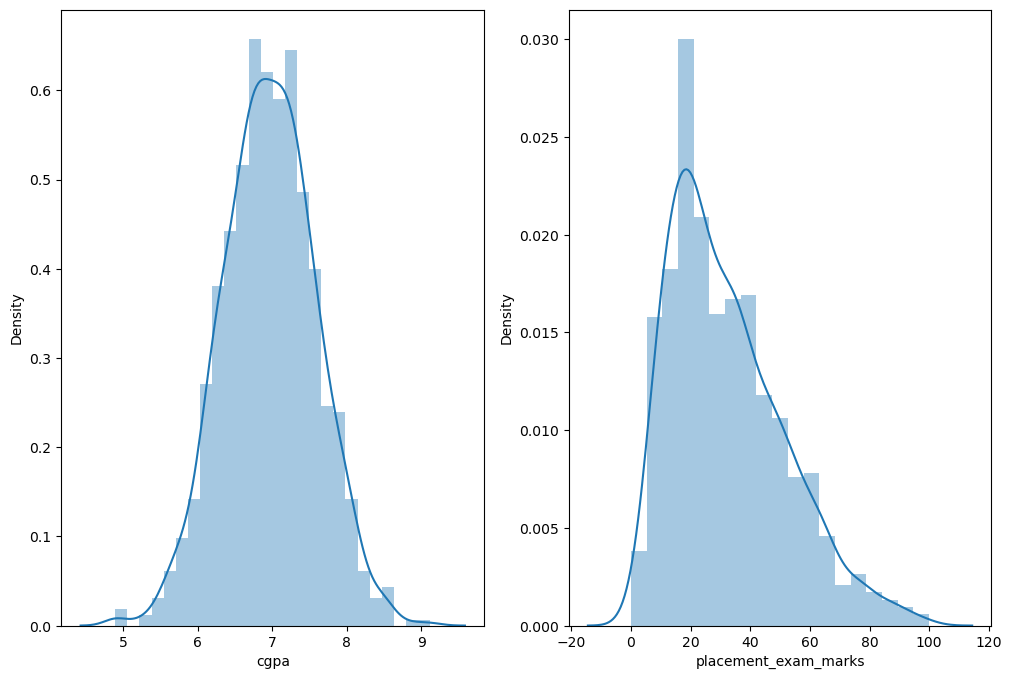

In [6]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [7]:
df.shape

(1000, 3)

In [8]:
df[df['cgpa']>7.6].head()

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
14,7.91,43.0,0
19,7.63,29.0,0
31,7.66,44.0,0
34,8.15,9.0,0


#### As we can see the `cgpa` is having uniform distribution of datapoints. So we will be having two options to handle the outliers 1) Trimming 2) Capping

#### 1) Trimming

In [9]:
mean_cgpa = df['cgpa'].mean()
sd_cgpa = df['cgpa'].std()
print(mean_cgpa,sd_cgpa)

6.96124 0.6158978751323894


In [10]:
z_score_upper_limit = mean_cgpa + 3 * sd_cgpa
z_score_lower_limit = mean_cgpa - 3 * sd_cgpa

print('max limit of cgpa', z_score_upper_limit)
print('min limit of cgpa', z_score_lower_limit)

max limit of cgpa 8.808933625397168
min limit of cgpa 5.113546374602832


In [11]:
df_trimmed1 = df[df['cgpa']<z_score_upper_limit]

In [12]:
df_trimmed2 = df_trimmed1[df_trimmed1['cgpa']>z_score_lower_limit]

In [13]:
# df_trimmed2

#### 2) Capping

In [14]:
print(df['cgpa'].mean())
print(df['cgpa'].std())

6.96124
0.6158978751323894


In [15]:
z_score_upper = df['cgpa'].mean() + 3*df['cgpa'].std()
z_score_lower = df['cgpa'].mean() - 3*df['cgpa'].std()

##### In capping method instead of removing the outliers from the feature column, we just replace the outlier datapoints with the z_score values.

In [16]:
df_capping = df

In [17]:
print('Before handling the outlier')
print(df_capping[df_capping['cgpa']>z_score_upper])
print(df_capping[df_capping['cgpa']<z_score_lower])

Before handling the outlier
     cgpa  placement_exam_marks  placed
995  8.87                  44.0       1
996  9.12                  65.0       1
     cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1


#### Replacing the outlier datapoint values with the max z-score & min z-score values respectively.

In [18]:
df_capping['cgpa'][df_capping['cgpa']>z_score_upper] = z_score_upper
df_capping['cgpa'][df_capping['cgpa']<z_score_lower] = z_score_lower

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_33480/2216326420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capping['cgpa'][df_capping['cgpa']>z_score_upper] = z_score_upper
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_33480/2216326420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capping['cgpa'][df_capping['cgpa']<z_score_lower] = z_score_lower


In [19]:
print('After handling the outlier')
print(df_capping[df_capping['cgpa']>z_score_upper])
print(df_capping[df_capping['cgpa']<z_score_lower])

After handling the outlier
Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed]
Index: []
Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed]
Index: []


In [20]:
df_capping['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64